In [13]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
df=pd.read_csv('3-21income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

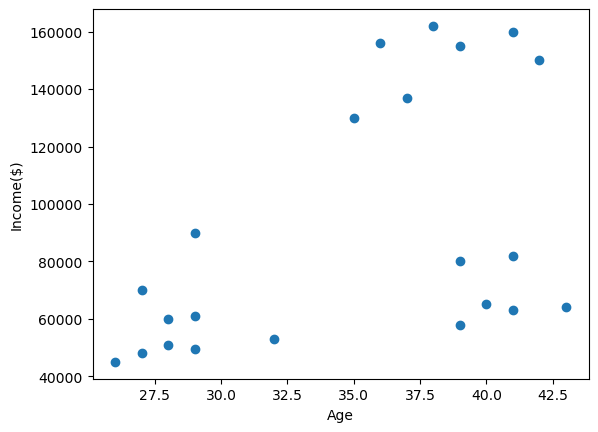

In [15]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [16]:
df_new=df.drop(['Name'],axis='columns')
df_new.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [17]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df_new)
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [18]:
df_new['cluster']=y_predicted
df_new.head()

,Age,Income($),cluster
0,27,70000,2
1,29,90000,2
2,29,61000,0
3,28,60000,0
4,42,150000,1


In [23]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [19]:
df1=df_new[df_new.cluster==0]
df2=df_new[df_new.cluster==1]
df3=df_new[df_new.cluster==2]
df1.head()


,Age,Income($),cluster
2,29,61000,0
3,28,60000,0
11,26,45000,0
12,27,48000,0
13,28,51000,0


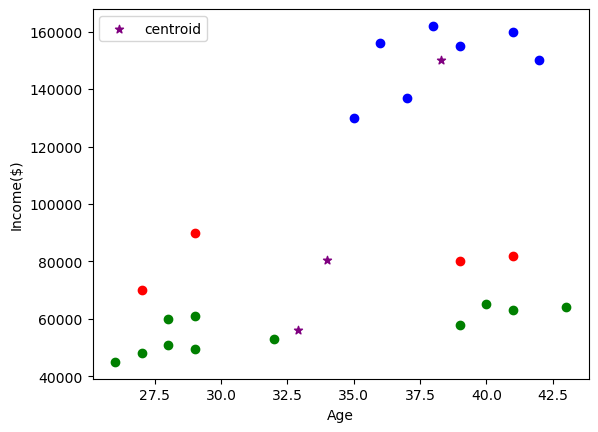

In [28]:
plt.scatter(df1['Age'],df1['Income($)'],color='green')
plt.scatter(df2['Age'],df2['Income($)'],color='blue')
plt.scatter(df3['Age'],df3['Income($)'],color='red')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple', marker='*',label="centroid")
plt.legend()

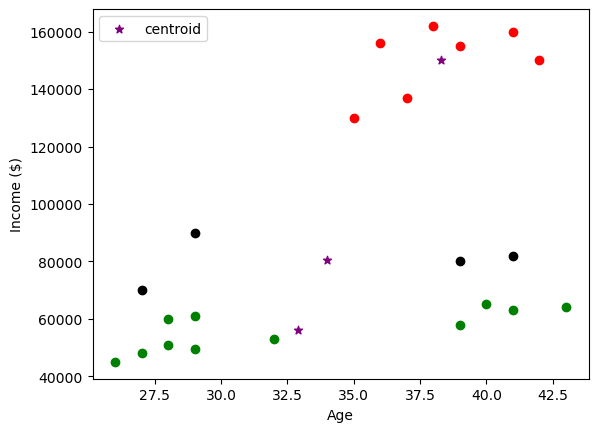

In [26]:
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [30]:
scaler = MinMaxScaler()
scaler.fit(df_new[['Income($)']])
df_new['Income($)']=scaler.transform(df_new[['Income($)']])

scaler.fit(df_new[['Age']])
df_new['Age']= scaler.transform(df_new[['Age']])

In [31]:
df_new

,Age,Income($),cluster
0,0.058824,0.213675,2
1,0.176471,0.384615,2
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1
5,0.764706,0.940171,1
6,0.882353,0.982906,1
7,0.705882,1.000000,1
8,0.588235,0.948718,1
9,0.529412,0.726496,1


In [32]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df_new)
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [33]:
km.cluster_centers_

array([[0.72268908, 0.8974359 , 1.        ],
       [0.40641711, 0.0951826 , 0.        ],
       [0.47058824, 0.3034188 , 2.        ]])

In [34]:
df1=df_new[df_new.cluster==0]
df2=df_new[df_new.cluster==1]
df3=df_new[df_new.cluster==2]
df1.head()


,Age,Income($),cluster
2,0.176471,0.136752,0
3,0.117647,0.128205,0
11,0.000000,0.000000,0
12,0.058824,0.025641,0
13,0.117647,0.051282,0


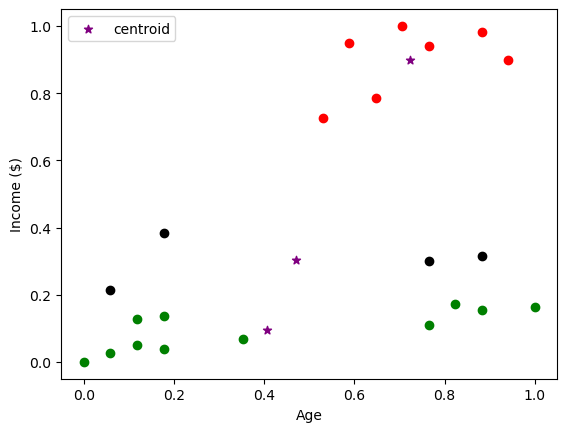

In [35]:
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [37]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_new[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\dejen\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [38]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.27768187154369994,
 0.22020960864009398,
 0.1685851223602976,
 0.1327661931978319,
 0.10497488680620909]

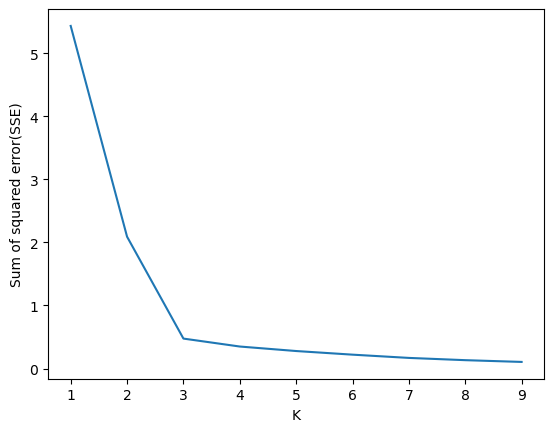

In [39]:
plt.xlabel('K')
plt.ylabel('Sum of squared error(SSE)')
plt.plot(k_rng,sse)